# Regressing 2D Data with a Single Neuron


<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch02_DNN_regression/ec02_2_neuron_reg_2d/neuron_reg_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<strong>If using Colab/Kaggle:</strong> You need to copy the auxiliary *.csv and *.py files from the
<a href="https://github.com/DeepTrackAI/DeepLearningCrashCourse/tree/main/Ch02_DNN_regression/ec02_2_neuron_reg_2d">notebook folder</a>
in GitHub to the Colab/Kaggle work directory.
</div>

This notebook provides you with a complete code example that loads the data contained in `data_reg_2d_clean.csv`, trains a neuron to fit them, and finally uses the trained neuron to predict the values of the data in `data_reg_2d_clean_test.csv`.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 2-2 from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Loading the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 0.09539425  0.62586094]
 [ 1.38026523  1.66483856]
 [ 0.88323335  1.21737326]
 [ 0.00583365  0.01259322]
 [-0.65958948  0.39365817]
 [-0.15699403  0.54888271]
 [-0.20260499 -0.48191721]
 [-1.04782585  0.34934672]
 [ 1.72214286 -0.10788593]
 [-0.34130321  0.26006667]]
y_gt: [[ 0.7304667 ]
 [ 0.48457333]
 [ 0.53413991]
 [ 0.20675957]
 [ 1.25324765]
 [ 0.90587675]
 [-0.07931222]
 [ 1.59717256]
 [-1.63002878]
 [ 0.80136988]]


## Visualizing the Data

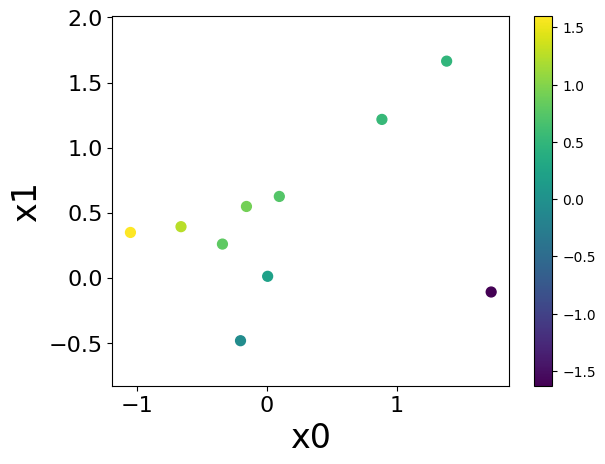

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Implementing a Neuron with Multiple Inputs

Create a single neuron with one vectorial weigth `w` and one vectorial input `x` (which can also be a 2D numpy vector if there are multiple imput vectors) ...

In [3]:
def neuron_reg_2d(w, x):
    """Artificial neuron for multidimensional regression."""
    return x @ w

... randomly initialize its weight vector ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w = rng.standard_normal(size=(2,))

... obtain its prediction `y_p` for the input data (which has the same shape as `x`) ...

In [5]:
y_p = neuron_reg_2d(w, x)

... and visualize its predictions.

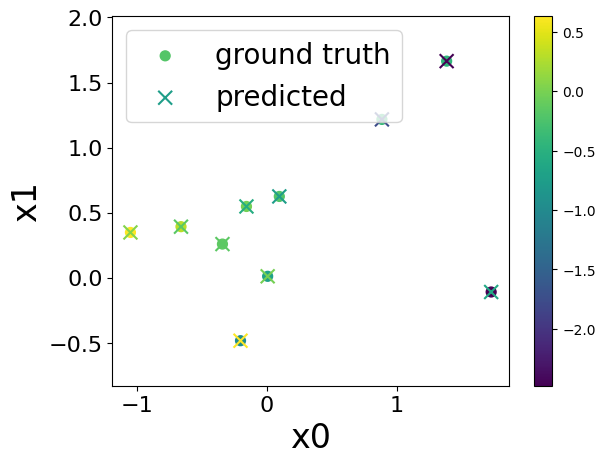

In [6]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x))

## Training the Neuron

Train the neuron ...

In [7]:
num_samples = len(x)
num_train_iterations = 100
eta = .1  # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples)  # Select random sample.
    x_selected = x[selected]
    y_gt_selected = y_gt[selected]

    y_p_selected = neuron_reg_2d(w, x_selected)  # Neuron prediction.

    error = y_p_selected - y_gt_selected  # Calculate error.

    w = w - eta * error * x_selected  # Update neuron weight.

    print(f"i={i} w0={w[0]:.2f} w1={w[1]:.2f} error={error[0]:.2f}")

i=0 w0=-0.46 w1=-1.11 error=-0.95
i=1 w0=-0.49 w1=-1.09 error=-0.93
i=2 w0=-0.58 w1=-1.03 error=-1.36
i=3 w0=-0.71 w1=-1.02 error=0.74
i=4 w0=-0.80 w1=-1.02 error=0.52
i=5 w0=-0.78 w1=-0.98 error=0.73
i=6 w0=-0.78 w1=-0.98 error=-0.22
i=7 w0=-0.81 w1=-0.96 error=-0.79
i=8 w0=-0.37 w1=-0.43 error=-3.21
i=9 w0=-0.51 w1=-0.38 error=-1.36
i=10 w0=-0.65 w1=-0.37 error=0.79
i=11 w0=-0.74 w1=-0.37 error=0.56
i=12 w0=-0.84 w1=-0.33 error=-0.95
i=13 w0=-0.88 w1=-0.33 error=0.22
i=14 w0=-0.91 w1=-0.33 error=0.15
i=15 w0=-0.90 w1=-0.27 error=-1.02
i=16 w0=-0.75 w1=-0.07 error=-1.65
i=17 w0=-0.77 w1=-0.05 error=-0.56
i=18 w0=-0.66 w1=0.10 error=-1.27
i=19 w0=-0.65 w1=0.15 error=-0.73
i=20 w0=-0.65 w1=0.15 error=-0.21
i=21 w0=-0.64 w1=0.19 error=-0.70
i=22 w0=-0.57 w1=0.30 error=-0.87
i=23 w0=-0.56 w1=0.34 error=-0.60
i=24 w0=-0.61 w1=0.37 error=-0.75
i=25 w0=-0.55 w1=0.44 error=-0.63
i=26 w0=-0.64 w1=0.47 error=-0.86
i=27 w0=-0.65 w1=0.50 error=-0.55
i=28 w0=-0.65 w1=0.50 error=-0.20
i=29 w0=-0.73

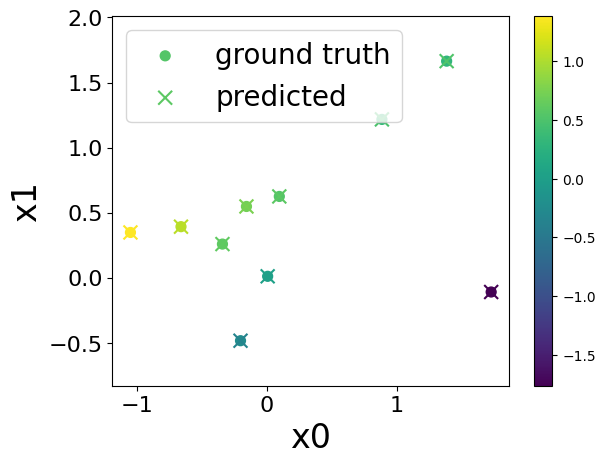

In [8]:
plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

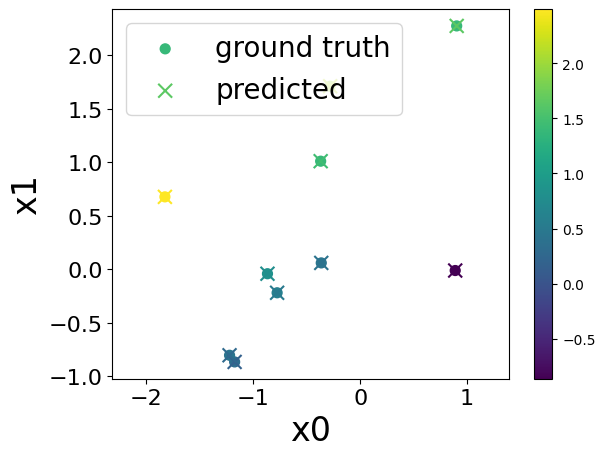

In [9]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=neuron_reg_2d(w, x_test))